1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
## Anaïs FRAGNE

import  numpy as np 

m = np.arange(12).reshape((3,4))
print('total mean is: ',np.mean(m))
print('mean of the columns: ',np.mean(m,axis=0))
print('mean of the lines: ',np.mean(m,axis=1))

total mean is:  5.5
mean of the columns:  [4. 5. 6. 7.]
mean of the lines:  [1.5 5.5 9.5]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [5]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
#1. Outer 

print(u)
print(v)

print('Outer product: ',np.outer(u,v))

[1 3 5 7]
[2 4 6 8]
Outer product:  [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [9]:
#2. For
outer=[[u[i]*v[j] for j in range(len(v))] for i in range(len(u))]
print('Outer product with for loop: ',outer)

[[2, 4, 6, 8], [6, 12, 18, 24], [10, 20, 30, 40], [14, 28, 42, 56]]


In [25]:
#3. Numpy Broadcast
outer= u[:, np.newaxis]*v

print('Outer product with Numpy broadcasting: ',outer)

Outer product with Numpy broadcasting:  [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [14]:
M=np.random.uniform(0, 3, size=(10,6))
print('Matrix M: ',M)
mask= (M<0.3)
M[mask]=0
print('Matrix after the mask: ',M)

Matrix M:  [[1.22562376 1.15058809 2.50041348 1.37708033 0.29857664 0.89414454]
 [0.40248975 0.09475767 2.40872057 0.78270223 0.57497439 2.60484384]
 [1.28947201 1.91829497 0.45979935 1.41295871 0.66642312 2.64033525]
 [0.88996379 2.72608427 1.61736268 0.52017304 0.49261766 0.88716918]
 [2.97913036 1.50252986 2.52418975 0.45799245 2.45169627 2.61841142]
 [0.32993465 1.37581686 2.12620415 0.81350391 1.70242189 1.31437609]
 [2.60340394 2.51103381 2.495397   2.63150204 2.34418043 2.90046963]
 [1.62960591 1.44742947 1.69358918 1.55216349 0.55079971 0.04733891]
 [1.69337709 1.87255274 2.41600313 2.11917924 0.39062646 1.62536468]
 [0.32708063 1.27466288 2.50342231 0.28437515 0.92186991 0.32159664]]
Matrix after the mask:  [[1.22562376 1.15058809 2.50041348 1.37708033 0.         0.89414454]
 [0.40248975 0.         2.40872057 0.78270223 0.57497439 2.60484384]
 [1.28947201 1.91829497 0.45979935 1.41295871 0.66642312 2.64033525]
 [0.88996379 2.72608427 1.61736268 0.52017304 0.49261766 0.88716918

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

arr:  [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.

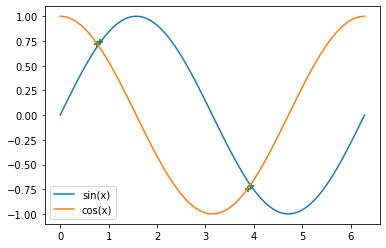

In [79]:
arr=np.linspace(0,2*np.pi,100)
print('arr: ',arr)
arr2=arr[0:-1:10]
print('Every 10th element of arr: ',arr2)
arr_rev=arr[::-1]
print('Reversed array: ',arr_rev)
mask= ((abs(np.sin(arr)-np.cos(arr))<0.1))
arr3=arr[mask]
print('filtered_array: ',arr3)

#Optional:

import matplotlib.pyplot as plt
y = np.sin(arr)
z = np.cos(arr)

plt.plot(arr,y,arr,z)
plt.legend(['sin(x)', 'cos(x)']) 


plt.scatter(arr3[0],np.cos(arr3[0]),c='g',marker='+')
plt.scatter(arr3[1],np.sin(arr3[1]),c='g',marker='+')
plt.scatter(arr3[2],np.cos(arr3[2]),c='g',marker='+')
plt.scatter(arr3[3],np.sin(arr3[3]),c='g',marker='+')
plt.show()
#In green, the crosses represent the points where the absolute difference between cos and sin is smaller than 0.1 according to the points of arr
#That is to say the green crosses are where sin and cos are close

5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [109]:
mult_tab=[[(i+1)*(j+1) for i in range(10)] for j in range(10)]
print('mult_tab: ',mult_tab)
trace_mat=[mult_tab[i][j] for i in range(10) for j in range(10) if i==j]
trace=np.sum(trace_mat)
print('The trace of the matrix is: ',trace)

anti_diag=[mult_tab[i][j] for i in range(9,0,-1) for j in range(10) if j+1==10-i]
print('The anti-diagonal matrix of my mult_tab is: ',anti_diag)

diag_offset=[mult_tab[i][j] for i in range(10) for j in range(10) if j== i+1] 
print('diag_offset: ', diag_offset)

mult_tab:  [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], [3, 6, 9, 12, 15, 18, 21, 24, 27, 30], [4, 8, 12, 16, 20, 24, 28, 32, 36, 40], [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], [6, 12, 18, 24, 30, 36, 42, 48, 54, 60], [7, 14, 21, 28, 35, 42, 49, 56, 63, 70], [8, 16, 24, 32, 40, 48, 56, 64, 72, 80], [9, 18, 27, 36, 45, 54, 63, 72, 81, 90], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]]
The trace of the matrix is:  385
The anti-diagonal matrix of my mult_tab is:  [10, 18, 24, 28, 30, 30, 28, 24, 18]
diag_offset:  [2, 6, 12, 20, 30, 42, 56, 72, 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [128]:
#1.
x=np.arange(5)
y=np.arange(5)[:,np.newaxis]
distance=np.sqrt(x**2 + y**2)
print('distance_grid: \n',distance)

#2.
x1=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
y1=x1[:,np.newaxis]
distance2=np.abs(x1-y1)
print('distance_route66: \n',distance2)

#3.
#1 km= 0,621371 miles
x2=x1/0.621371
y2=x2[:,np.newaxis]
distance3=np.abs(x2-y2)
print('distance_route66 in km: \n',distance3)

distance_grid: 
 [[0.         1.         2.         3.         4.        ]
 [1.         1.41421356 2.23606798 3.16227766 4.12310563]
 [2.         2.23606798 2.82842712 3.60555128 4.47213595]
 [3.         3.16227766 3.60555128 4.24264069 5.        ]
 [4.         4.12310563 4.47213595 5.         5.65685425]]
distance_route66: 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
distance_route66 in km: 
 [[   0.          318.65021058  487.63138286 1184.47755045 1401.73905766
  1890.97978502 2373.78313439 2484.82790475

In [161]:
import timeit
N=99
mask= [True]*(N+1)
numbers=np.arange(N+1)


def isPrime(mask,N):
    for i in range(2,N):
        if  i % 2 == 0:
            mask[i]=False
        for x in range(2,i//2):
            if i%x==0:
                mask[i]=False
    return mask

print('mask: \n',isPrime(mask,N))
prime_numbers=numbers[isPrime(mask,N)] 
prime_numbers=prime_numbers[2:]
print('prime_numbers: \n',prime_numbers)
print('time of the function: ',timeit.timeit('isPrime(mask,N)',globals=globals(), number=1))

def isPrime_opti(mask,N):
    l=int(np.sqrt(N))
    for i in range(2,l+1):
        if mask[i]:
            for j in range(i**2,N,i):
                mask[j]=False
    return mask

print('mask optimized: \n',isPrime_opti(mask,N))
print('Are the two masks the same objects ?: ',isPrime(mask,N) == isPrime_opti(mask,N))
prime_numbers=numbers[isPrime_opti(mask,N)] 
prime_numbers=prime_numbers[2:]
print('prime_numbers with Sieve of Eratosthenes: \n',prime_numbers)
print('time of the function: ',timeit.timeit('isPrime_opti(mask,N)',globals=globals(), number=1))

#The optimized function using the Sieve_of_Eratosthenes is faster

mask: 
 [True, True, False, True, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True]
prime_numbers: 
 [ 3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97
 99]
time of the function:  0.00013008299720240757
mask optimized: 
 [True, True, False, True, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, True, 

8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

In [182]:
x=np.arange(1000)
y=np.arange(200)[:,np.newaxis]
walk= np.random.randint(0,2,size=(len(x),len(y)))
walk[walk == 0]=-1
print(walk)
walking_dist=[]
s=0
for l in walk:
    for j in range(len(l)):
        s+=l[j]
    walking_dist.append(s)
print('walking_dist: ',walking_dist)
square_walking_dist=np.square(walking_dist)


[[ 1  1  1 ...  1 -1 -1]
 [-1 -1  1 ... -1  1 -1]
 [ 1 -1 -1 ... -1 -1  1]
 ...
 [-1 -1  1 ... -1  1 -1]
 [-1  1  1 ... -1  1  1]
 [ 1 -1  1 ...  1  1 -1]]
walking_dist:  [2, 12, 2, 22, 14, 30, 24, 2, 8, 22, 26, 18, 18, 44, 66, 80, 84, 96, 98, 106, 108, 114, 126, 114, 106, 124, 110, 88, 90, 98, 106, 98, 100, 104, 88, 108, 90, 78, 48, 54, 64, 66, 82, 96, 88, 96, 78, 60, 68, 84, 82, 108, 96, 80, 84, 80, 84, 90, 98, 88, 112, 120, 134, 120, 136, 118, 128, 144, 162, 160, 172, 182, 164, 182, 176, 184, 176, 176, 176, 172, 194, 186, 192, 196, 206, 214, 224, 220, 222, 236, 254, 256, 254, 250, 234, 260, 272, 278, 272, 288, 286, 284, 274, 266, 268, 260, 230, 230, 224, 240, 248, 284, 296, 302, 310, 302, 318, 328, 326, 294, 286, 282, 268, 264, 282, 276, 284, 266, 260, 274, 290, 274, 282, 260, 242, 258, 266, 250, 260, 268, 256, 254, 246, 218, 232, 226, 226, 226, 206, 216, 220, 230, 214, 186, 192, 206, 196, 188, 170, 146, 138, 118, 100, 106, 94, 90, 56, 52, 44, 36, 34, 52, 48, 38, 30, 44, 30, 32, 54,